In [1]:
# import libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# cleanng data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# cleaning the 'job_skills' into a list datatype
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\ezequ\anaconda3\envs\luke_b\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# only get data analyst jobs
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# drop NaN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US['salary_year_avg'].sample(10)

311237    110000.0
389756     80000.0
522877     95000.0
684213     77400.0
63045     125000.0
428385     92500.0
759946    109159.0
284035    119000.0
509522    150000.0
742260     85000.0
Name: salary_year_avg, dtype: float64

<Axes: >

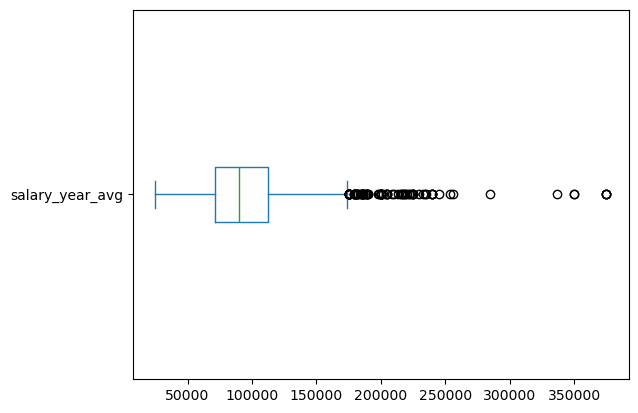

In [6]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1decf31a9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1decf31be10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1decf31a150>],
 'medians': [<matplotlib.lines.Line2D at 0x1decf32d150>],
 'fliers': [<matplotlib.lines.Line2D at 0x1decf32d9d0>],
 'means': []}

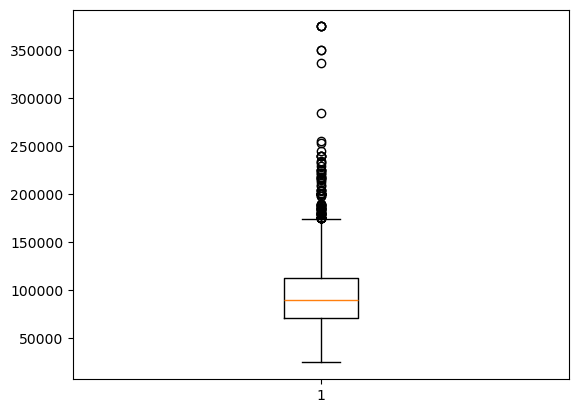

In [7]:
plt.boxplot(df_DA_US['salary_year_avg'])

C:\Users\ezequ\AppData\Local\Temp\ipykernel_5028\2594149832.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


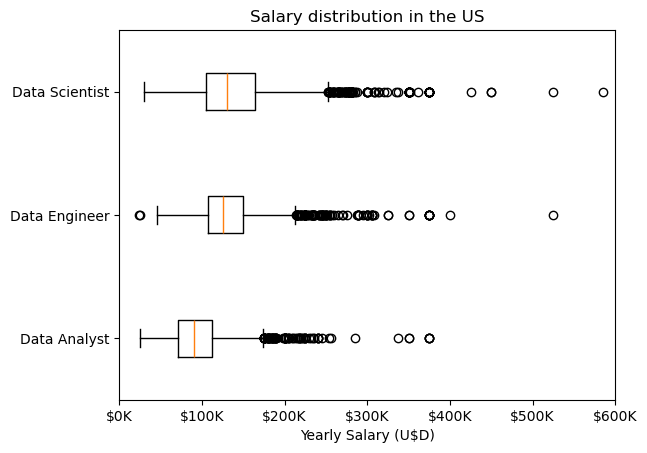

In [20]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter the data to appropiate job_titles
# only get fata analyst jobs
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary distribution in the US')
plt.xlabel('Yearly Salary (U$D)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()